# Visualisation of Atomic Movement and Polarisation

In this notebook we'll look at the <b>Polarisation.py</b> Module.
Using Atomap sublattices, it allows you to:
1. Map the movement of atoms relative to a given position
2. Find the deviation of atom positions from the various zone axes
3. Customise the visualisation of the atomic movement.

In [1]:
%matplotlib nbagg
import temul.polarisation as pol
import numpy as np
import atomap.api as am
import hyperspy.api as hs

In [2]:
sub1_image = hs.load('sub1_image.hspy')
atom_positions_A = np.load('atom_positions2.npy')
atom_positions_B = np.load('sub2_atom_positions_refined_new2.npy').T
x = atom_positions_A[:, 0]
y = atom_positions_A[:, 1]

## Calculate and plot the atom movement 

In [3]:
u, v = pol.find_polarisation_vectors(atom_positions_A=atom_positions_A, atom_positions_B=atom_positions_B)

<IPython.core.display.Javascript object>


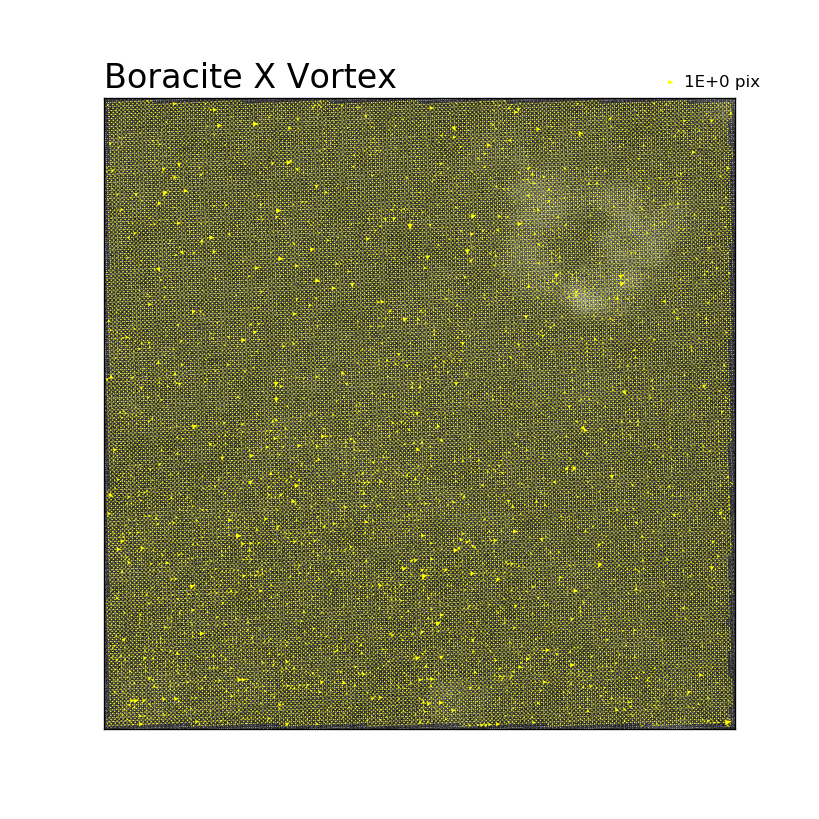

c:\users\eocli\miniconda3\lib\site-packages\temul\polarisation.py:247: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  pad_inches=None, dpi=300, labels=False)


In [4]:
pol.plot_polarisation_vectors(x=x, y=y, u=u, v=v, image=sub1_image.data,
                                  scale=0.1, scale_units='xy', headwidth=4.0,
                                  title='Boracite X Vortex', monitor_dpi=300)

-----------
## Average the atom movement over several unit cells

In [5]:
divide_into = 16

x_new, y_new, u_new, v_new = pol.get_average_polarisation_in_regions(x, y, u, v, image=sub1_image.data, divide_into=divide_into)

<IPython.core.display.Javascript object>


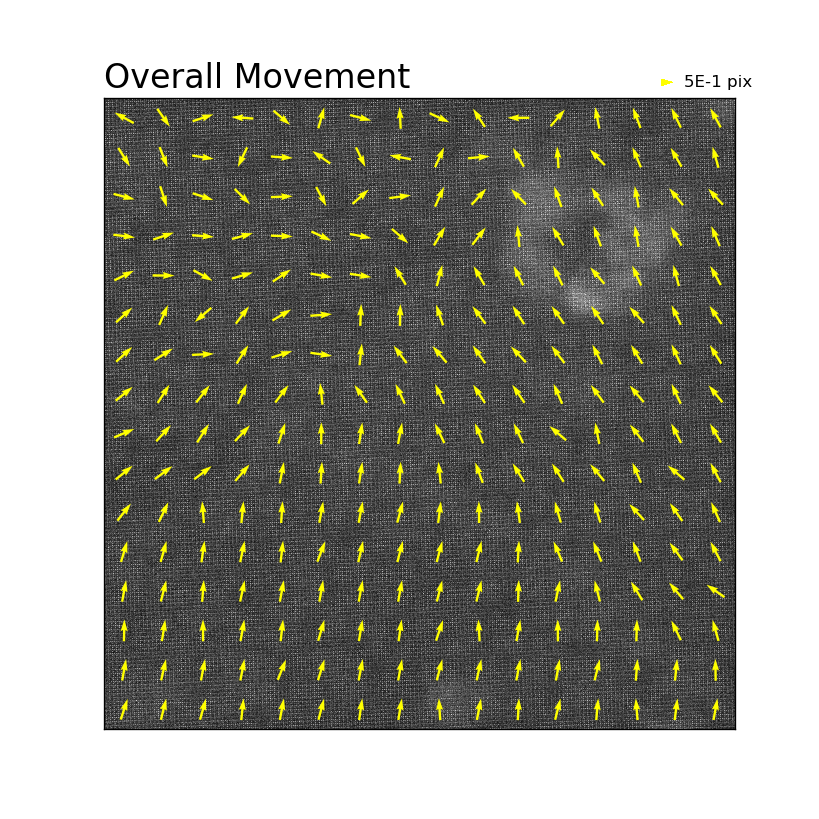

In [6]:
pol.plot_polarisation_vectors(x_new, y_new, u_new, v_new, image=sub1_image.data,
                                  normalise=True, save=None, monitor_dpi=300,
                                  plot_style='vector', color='yellow',
                                  overlay=True, title='Overall Movement')

<IPython.core.display.Javascript object>


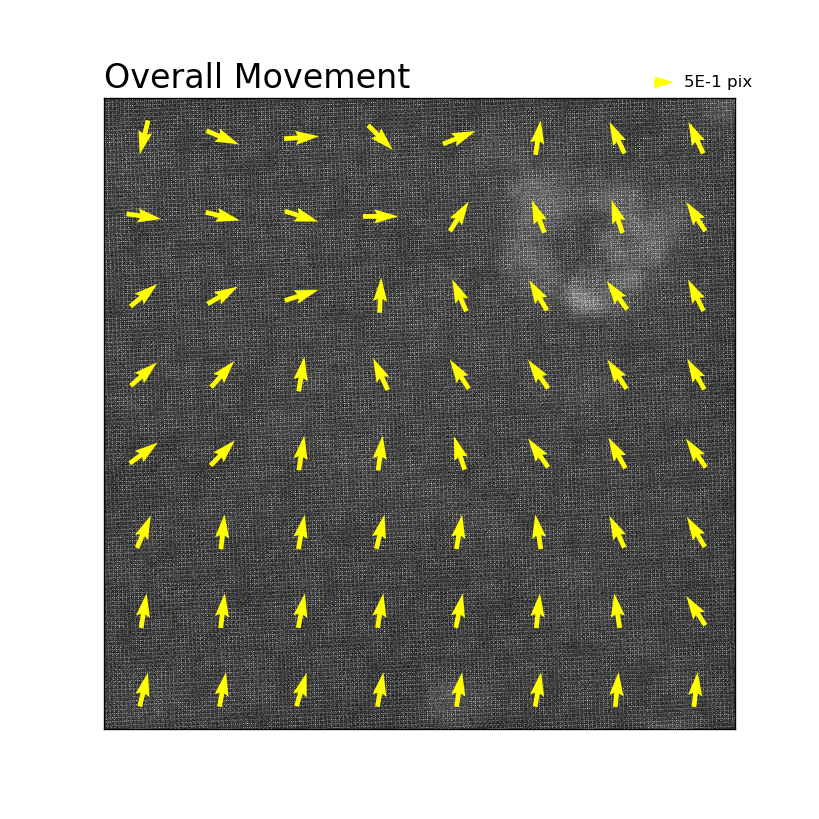

In [7]:
divide_into = 8

x_new, y_new, u_new, v_new = pol.get_average_polarisation_in_regions(x, y, u, v, image=sub1_image.data, divide_into=divide_into)
pol.plot_polarisation_vectors(x_new, y_new, u_new, v_new, image=sub1_image.data,
                                  normalise=True, save=None, monitor_dpi=300,
                                  plot_style='vector', color='yellow',
                                  overlay=True, title='Overall Movement')

<IPython.core.display.Javascript object>


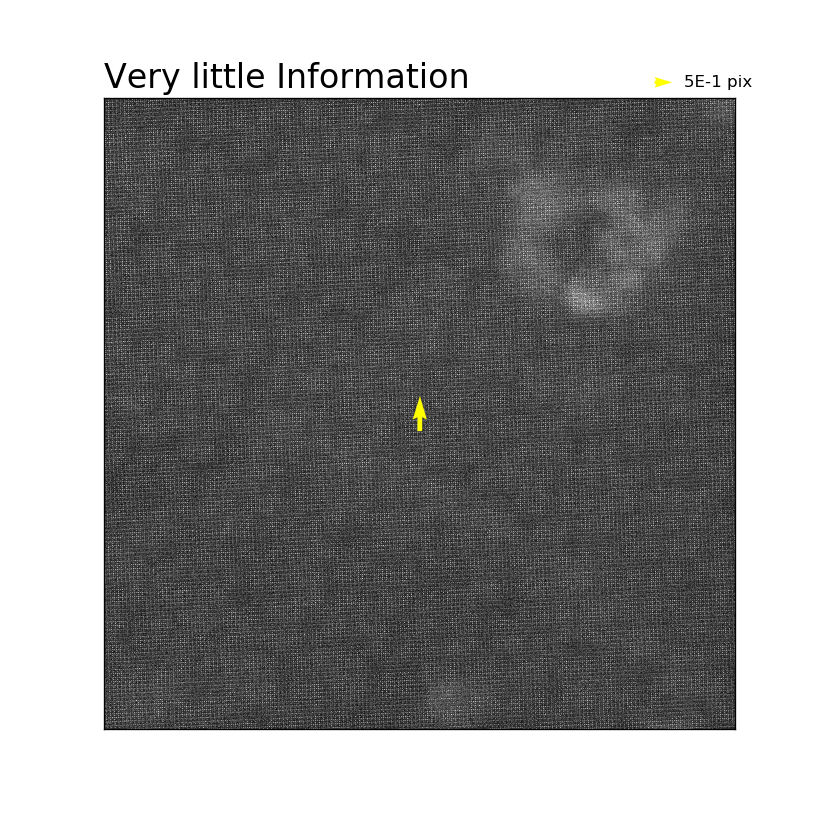

In [8]:
divide_into = 1

x_new, y_new, u_new, v_new = pol.get_average_polarisation_in_regions(x, y, u, v, image=sub1_image.data, divide_into=divide_into)
pol.plot_polarisation_vectors(x_new, y_new, u_new, v_new, image=sub1_image.data,
                                  normalise=True, save=None, monitor_dpi=300,
                                  plot_style='vector', color='yellow',
                                  overlay=True, title='Very little Information')

<IPython.core.display.Javascript object>


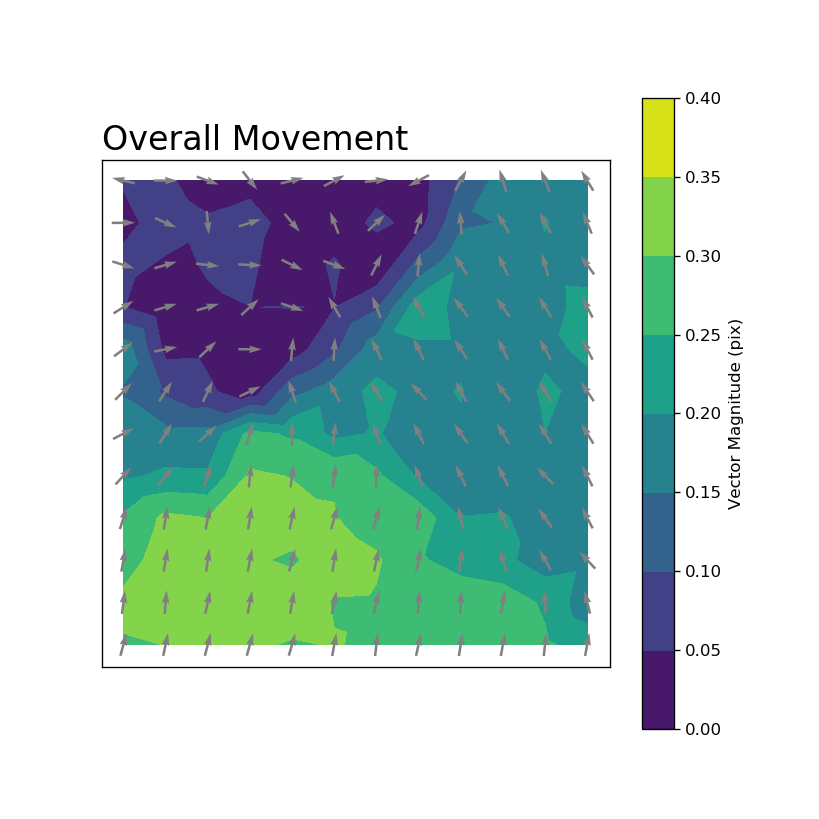

In [9]:
plot_style='contour'

x_new, y_new, u_new, v_new = pol.get_average_polarisation_in_regions(x, y, u, v, image=sub1_image.data, divide_into=12)
pol.plot_polarisation_vectors(x_new, y_new, u_new, v_new, image=sub1_image.data,
                                  normalise=True, save=None, monitor_dpi=300,
                                  plot_style=plot_style, color='gray',
                                  overlay=False, title='Overall Movement')

<IPython.core.display.Javascript object>


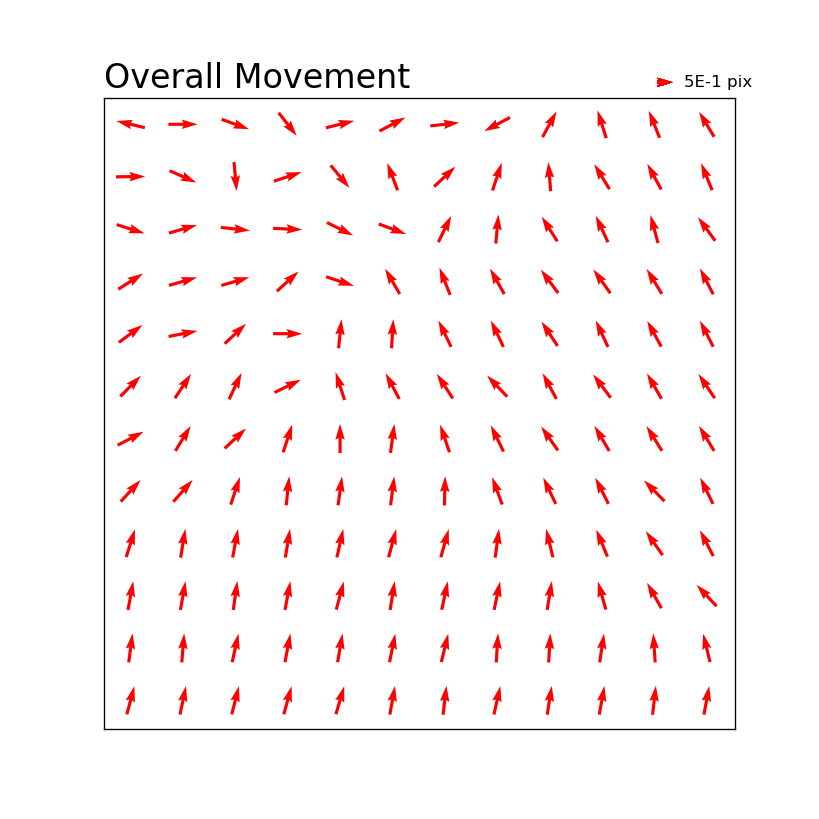

In [10]:
plot_style='vector'
color='red'

x_new, y_new, u_new, v_new = pol.get_average_polarisation_in_regions(x, y, u, v, image=sub1_image.data, divide_into=12)
pol.plot_polarisation_vectors(x_new, y_new, u_new, v_new, image=sub1_image.data,
                                  normalise=True, save=None, monitor_dpi=300,
                                  plot_style=plot_style, color=color,
                                  overlay=False, title='Overall Movement')

<IPython.core.display.Javascript object>


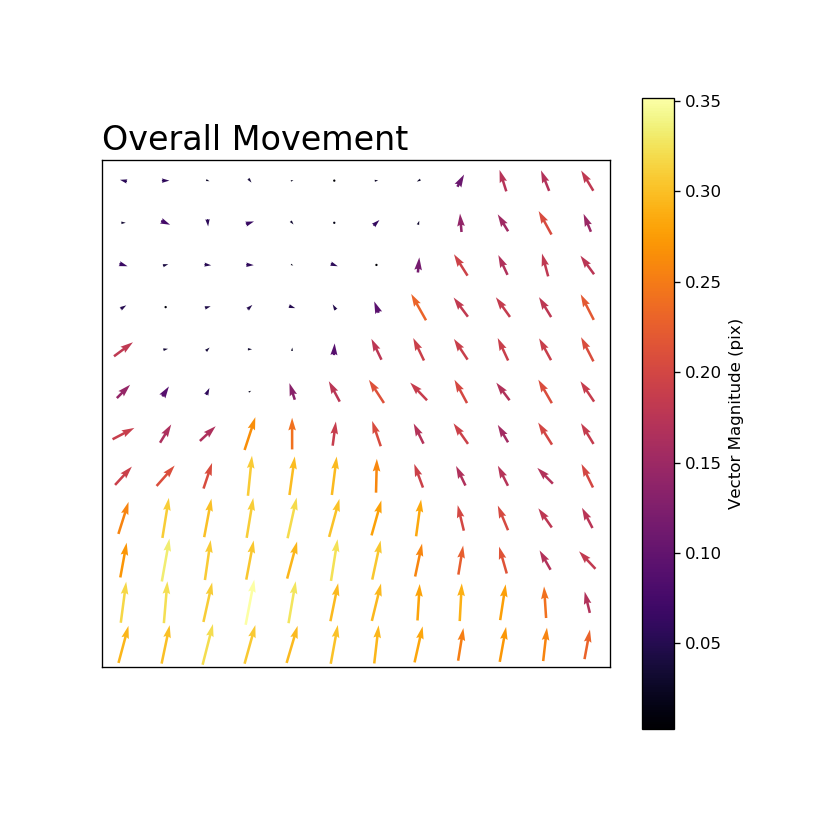

c:\users\eocli\miniconda3\lib\site-packages\temul\polarisation.py:247: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  pad_inches=None, dpi=300, labels=False)


In [11]:
plot_style='colormap'
cmap = 'inferno'

x_new, y_new, u_new, v_new = pol.get_average_polarisation_in_regions(x, y, u, v, image=sub1_image.data, divide_into=12)
pol.plot_polarisation_vectors(x_new, y_new, u_new, v_new, image=sub1_image.data,
                                  normalise=False, save='low_mag_', monitor_dpi=300,
                                  plot_style=plot_style, color=None, cmap=cmap,
                                  overlay=False, title='Overall Movement')

In [4]:
# Back up
atom_lattice = am.load_atom_lattice_from_hdf5('Atom_Lattice.hdf5', construct_zone_axes=False)
sub1_image = atom_lattice.sublattice_list[0].signal
import hyperspy.api as hs
sub1_image.save('sub1_image.hspy')

Overwrite 'sub1_image.hspy' (y/n)?
n
